<a href="https://colab.research.google.com/github/Tobsam237/Resume_Recommendation/blob/master/CapstoneP_ResumeRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resume Reccomendation**

![Resume Recco](https://az505806.vo.msecnd.net/cms/b7e9e2b0-9bc4-4a81-bbae-5ea2f4b97b64/9cf89d04-e931-46e7-8e30-95100886ec71-lg.jpg)

In this study, I will match collection of resumes in .docx formats with a Job description and sort them accordingly to their cosine similarity score in descending order. There are 139 resumes and all are data science/analytics related.

This work is useful for hiring managers and hr teams across all boards to help filter out multiple resumes, to find the most related candidates with a pre-defined job description for a particular role.


This Google Collab--Python 3 environment comes with several helpful anlaytics libraires installed and also has a powerful TPU/GPU available at our disposal.
However, we require python-docx library to work with .docx files, which is not pre-installed

**To begin, we install and let's load neccesary packages**

In [10]:
!pip install python-docx

     |████████████████████████████████| 5.5MB 6.8MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.10-cp36-none-any.whl size=184491 sha256=7dc118e34f385436b6650bb097a2ea1bbe60cde3c2571d62e1eae3eac6ab2493
  Stored in directory: /root/.cache/pip/wheels/18/0b/a0/1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built python-docx


In [11]:
#import packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob
import docx

In [13]:
#upload resume from drive
from google.colab import files
uploaded = files.upload()

Saving ABHINAV_RAHATE_CV.PDF to ABHINAV_RAHATE_CV.PDF
Saving aditya_Kashyn_ Resume.docx to aditya_Kashyn_ Resume.docx
Saving Akshay Mukundwar.pdf to Akshay Mukundwar.pdf
Saving Alok Roy_Resume_DS.doc to Alok Roy_Resume_DS.doc
Saving Anoosh_1year...docx to Anoosh_1year...docx
Saving Anup Vasanth - BA.docx to Anup Vasanth - BA.docx
Saving Balaji_Resume.docx to Balaji_Resume.docx
Saving CV-Ajitesh_Chauhan-converted.pdf to CV-Ajitesh_Chauhan-converted.pdf
Saving Divyansh_Kumar_Singh.pdf to Divyansh_Kumar_Singh.pdf
Saving DS Oluwatoba Resume.docx to DS Oluwatoba Resume.docx
Saving Frenix_Rajiah_Resume-converted.pdf to Frenix_Rajiah_Resume-converted.pdf
Saving General Content.docx to General Content.docx
Saving Karan_bari.pdf to Karan_bari.pdf
Saving lda_model_sym_wiki.pkl to lda_model_sym_wiki.pkl
Saving Nikhil Resume.docx to Nikhil Resume.docx
Saving Parag.pdf to Parag.pdf
Saving Priya_DS_Resume.docx to Priya_DS_Resume.docx
Saving Priya_Resume(1).docx to Priya_Resume(1).docx
Saving Priya_R

 **A closer look at our uploaded resumes reveals there are multiple formats: .docx, doc, pkl, pdf formats.Thus,**

- Using glob module, we define a function that extracts resumes only in .docx format
- Then, extract text from each .docx resumes and tabulate, to create corpus using the getTextdoc module

In [14]:
#get .docx files from a given path
worddocx = glob.glob('./*.docx')

In [15]:
#define a function to extract text from any given .docx
def getTextdoc(filename):
  doc = docx.Document(filename)
  fullText = []
  for para in doc.paragraphs:
    fullText.append(para.text)
  return '\n'.join(fullText)


In [16]:
#extract text doc and compile them in a dataframe
li= []

for filenames in worddocx:
  content = getTextdoc(filenames)
  li.append(content)

df= pd.DataFrame(li, columns=['Contents'])

In [17]:
df.head()

,Contents
0,resume_107@gmail.com\n480.746.3254\nSwaminatha...
1,resume_52@gmail.com\n(203)-197-1989\nJob Seeke...
2,resume_74@gmail.com\n534-158-7160\nMegan Phill...
3,resume_47@gmail.com\n538-512-8008\nHoward Alfo...
4,resume_76@gmail.com\n(948)-261-2460\nMelissa B...


**Next, we import and read the job desription(JD) and vizualize its keywords using wordcloud.**

In [20]:
#uploaded job description
uploaded2= files.upload()

Saving ds job_Descr.docx to ds job_Descr.docx


In [21]:
#uploaded job description
uploaded3= files.upload()

Saving Data Analyst Job Description.docx to Data Analyst Job Description.docx


In [38]:
cloud_images = files.upload()

Saving clipart945467.png to clipart945467.png
Saving cloud.jpg to cloud.jpg


In [22]:
#extract text from JD
job_descr = getTextdoc('ds job_Descr.docx')

In [23]:
#implementing Wordcloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [42]:
stopword = set(STOPWORDS)
custom_mask = np.array(Image.open("cloud.jpg"))
wc = WordCloud(background_color='white', stopwords=stopword, mask = custom_mask)

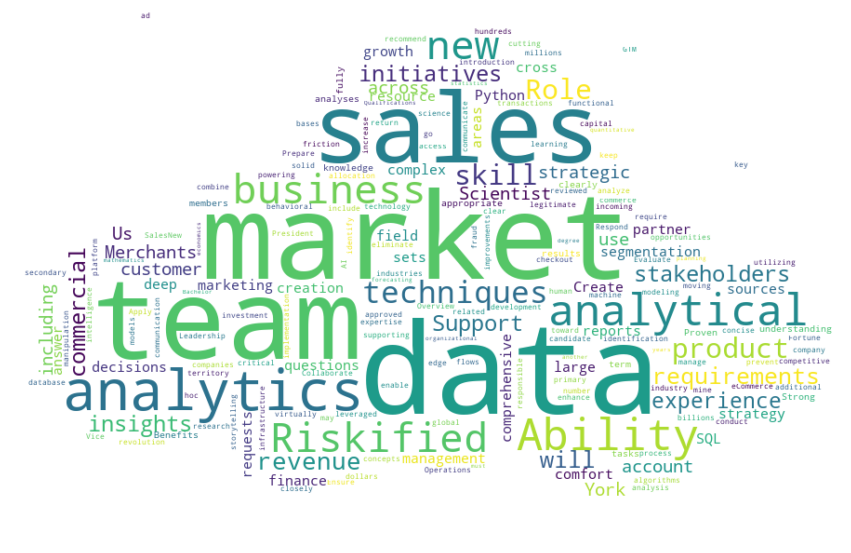

In [59]:
wc_jd1 = wc.generate(job_descr)
plt.figure(figsize=(15,10))
plt.imshow(wc_jd1, interpolation='bilinear')
plt.axis('off')
plt.show()

**Next, we tokenize and vectorize the corpus of resumes using the sklearn's CountVectorizer module.**

In [18]:
#import text vectoriser
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [19]:
#import cosine_similarity test to check compare vectors
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
#try out--- success
cosine_similarity(cv.fit_transform([getTextdoc(worddocx[34]), job_descr]))

array([[1.        , 0.51116588],
       [0.51116588, 1.        ]])

In [22]:
#create a list of vectorised text extracted from .docx file. And loop through all  
cos_sim = []
for i in range(len(worddocx)):
  abc = cosine_similarity(cv.fit_transform([getTextdoc(worddocx[i]), job_descr]))
  cos_sim.append(abc)

In [33]:
cos_sim[0]

array([[1.        , 0.55467329],
       [0.55467329, 1.        ]])

**Now, we obtain similarity scores for each resume in corpus using the *cosine_similarity***

In [34]:
#find similarity text between resume vector-form and job description vector-form
Similarity_Score = []
for i in range(len(cos_sim)):
  x = cos_sim[i][1][0] * 100
  Similarity_Score.append(x)

#df.append()
#for i in range(len(cos_sim)):
 # df.assign(Similarity_Score = round(cos_sim[i][0][1] * 100))

In [35]:
Similarity_Score[0]

55.46732922768215

In [36]:
#affix Similarity_Score in dataframe
df = df.assign(Sim_Score= Similarity_Score )

**Now, to find the most similar resumes to JD, we sort corpus by the similarity score in descending order** 

In [37]:
#sort table by Sim_Score
df_final = df.sort_values('Sim_Score', ascending= False)
df_final.head(10)


,Contents,Sim_Score
129,resume_22@gmail.com\n387.201.9128\nDaniel Ilie...,82.614586
28,resume_63@gmail.com\n(269).082.7131\nLaura Sin...,82.572240
74,Madhurima Sengupta\nE-Mail: sgmadhurima@gmail....,82.172661
51,resume_76@gmail.com\n(948)-261-2460\nMelissa B...,81.313869
5,resume_15@gmail.com\n(169) 092 8115\nBrad Gall...,81.228530
44,TS VENKATA KRISHNAN\nE-Mail: venkey619@icloud....,80.820148
22,resume_121@gmail.com\n887-158-1173\nBrattlebor...,80.449653
93,VISHNU NANDAN CHINTA\nE-Mail: vishnunandan318@...,80.140733
23,resume_83@gmail.com\n(831) 225 1505\nMitch Kra...,79.885348
52,resume_92@gmail.com\n977 221 6451\nRuth Willis...,79.299834


In [38]:
df_final=df_final.reset_index(drop = True)

In [39]:
# Here are the top five resumes with the most keywords with jd
df_final.head()

,Contents,Sim_Score
0,resume_22@gmail.com\n387.201.9128\nDaniel Ilie...,82.614586
1,resume_63@gmail.com\n(269).082.7131\nLaura Sin...,82.572240
2,Madhurima Sengupta\nE-Mail: sgmadhurima@gmail....,82.172661
3,resume_76@gmail.com\n(948)-261-2460\nMelissa B...,81.313869
4,resume_15@gmail.com\n(169) 092 8115\nBrad Gall...,81.228530


In [60]:
worddocx[129]

'./resume_9.docx'

In [41]:
#Thus, the get any resume in df based on index 
print(getTextdoc(worddocx[129]))

resume_22@gmail.com
387.201.9128
Daniel Iliescu
R&D and Product Development Manager
White River Junction VT - Email me on Indeed: indeed.com/r/Daniel-Iliescu/35ec7d6392bbb3ec
 Experienced materials scientist and R&D manager with a versatile multi-disciplinary skill set and a pragmatic customer-focused operational approach. Highly innovative and resourceful.
 Led and directed the innovation R&D efforts of a high-tech materials company aimed at creating disruptive technologies and products.
 Skilled in managing complex technical projects and driving the decision making process across several simultaneous projects. Strong ability to anticipate possible outcomes or roadblocks and create contingency plans to minimize project disruptions and ensure progress in a timely manner along the critical path.
 Detail oriented. Data and pragmatic return-on-investment driven decision making process.
 Managed complex projects involving large US and foreign companies legal firms (regulatory and intellect

**Finally, let's see the keywords in most similar resume using wordcloud**

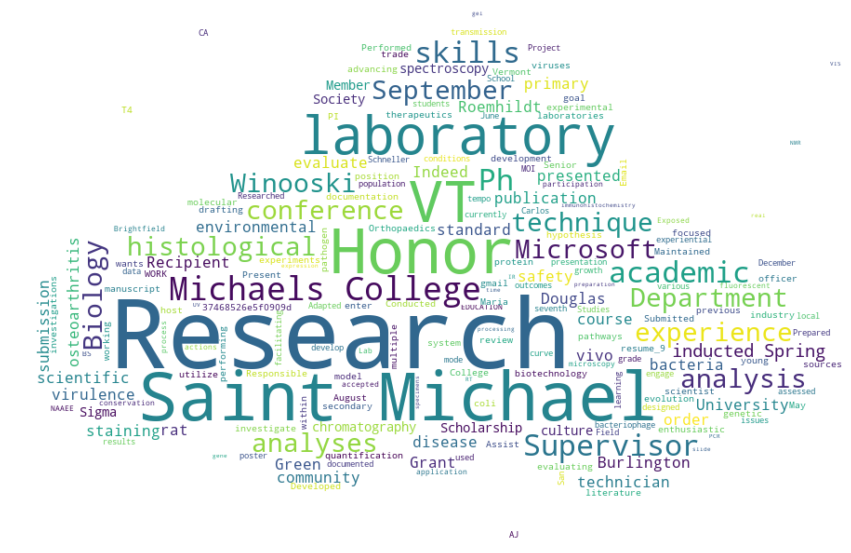

In [61]:
wc_jd1 = wc.generate(getTextdoc(worddocx[129]))
plt.figure(figsize=(15,10))
plt.imshow(wc_jd1, interpolation='bilinear')
plt.axis('off')
plt.show()

## Future Work:
- Enable *.pdf* formats readable
- Enable *.pkl* formats readable